# Project Linear Regression: Boston House Price Prediction

**Marks: 30**

Dear Learner,

Welcome to project on Linear Regression. We will use the Boston house price data for the exercise.
Do read the problem statement and the guidelines around the same.

---
### Problem Statement
---------------------------
The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
### Data Information
---------------------------
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.

-------
### Tools
-----------
- We will use sklearn and statsmodel for this exercise


---------------------------
## Guidelines
-----------------------------------------
- The exercise consists of semi written code blocks. You need to fill the blocks as per the instructions to achieve the required results.
- To be able to complete the assessment in the expected time, do not change the variable names. The codes might throw errors when the names are changed. 
- The marks of each requirement is mentioned in the question.
- You can raise your issues on the discussion forum on the Olympus.
- You can use Jupyter Notebook/ Google Colab(recommended) for this assessment.
- Uncomment the code snippets and work on them
--------------------------------------------
Wishing you all the best!

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [3]:
df.shape

(506, 13)

**Get the info data types column wise**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### 1. Check missing values(1 marks)

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

### 2. Figure out the statistical Summary of all the numerical columns. Mention all the columns that present a significant skew by looking at the summary. (3 marks)

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Insights:**
- CRIM has mean 3.6 and median 0.26. Since the median is much lower than the mean, CRIM is significantly right-skewed.
- ZN has mean 11.4 and median 0. ZN is significantly right skewed. Since ZN is the proportion of residential land zoned for lots over 25,000 sq.ft., it would be 0 for many of the rows where the lots are smaller.
- INDUS has mean 11.1 and median 9.7. It is slightly right skewed but it is not significantly skewed.
- CHAS has mean 0.07 and median 0. There is a slight right skew. It applies only to lots bordering the Charles river. It is not significantly skewed. There are outliers, because 75% values are 0, but max is 1.
- NOX has mean 0.55 and median 0.54. Since the mean and median are very close, it is not skewed.
- RM has mean 6.28 and median 6.21. Since the mean and median are very close, it is not skewed.
- AGE has mean 68.6 and median 77.5. It is left skewed.
- DIS has mean 3.8 and median 3.2. Since mean is higher than median, it is right skewed.
- RAD has mean 9.55 and median 5. Since mean is higher than median, it is right skewed.
- TAX has mean 408.2 and median 330. Since mean is higher than median, it is right skewed.
- PTRATIO has mean 18.5 and median 19.05. Since mean is lower than median, it is left skewed.
- LSTAT has mean 12.65 and median 11.36. Since mean is higher than median, it is right skewed.
- MEDV has mean 22.5 and median 21.2. Since mean is higher than median, it is right skewed.


- **Solution: Significantly skewed features:**
 - Right skewed: CRIM, ZN, DIS, RAD, TAX, LSTAT, MEDV
 - Left skewed: AGE, PTRATIO



### 3. Visualising the features at hand - (2 marks)

- Construct a pairplot for all the features using 'kde' type for the diagonal.
- Provide insights from the plots (1 marks)

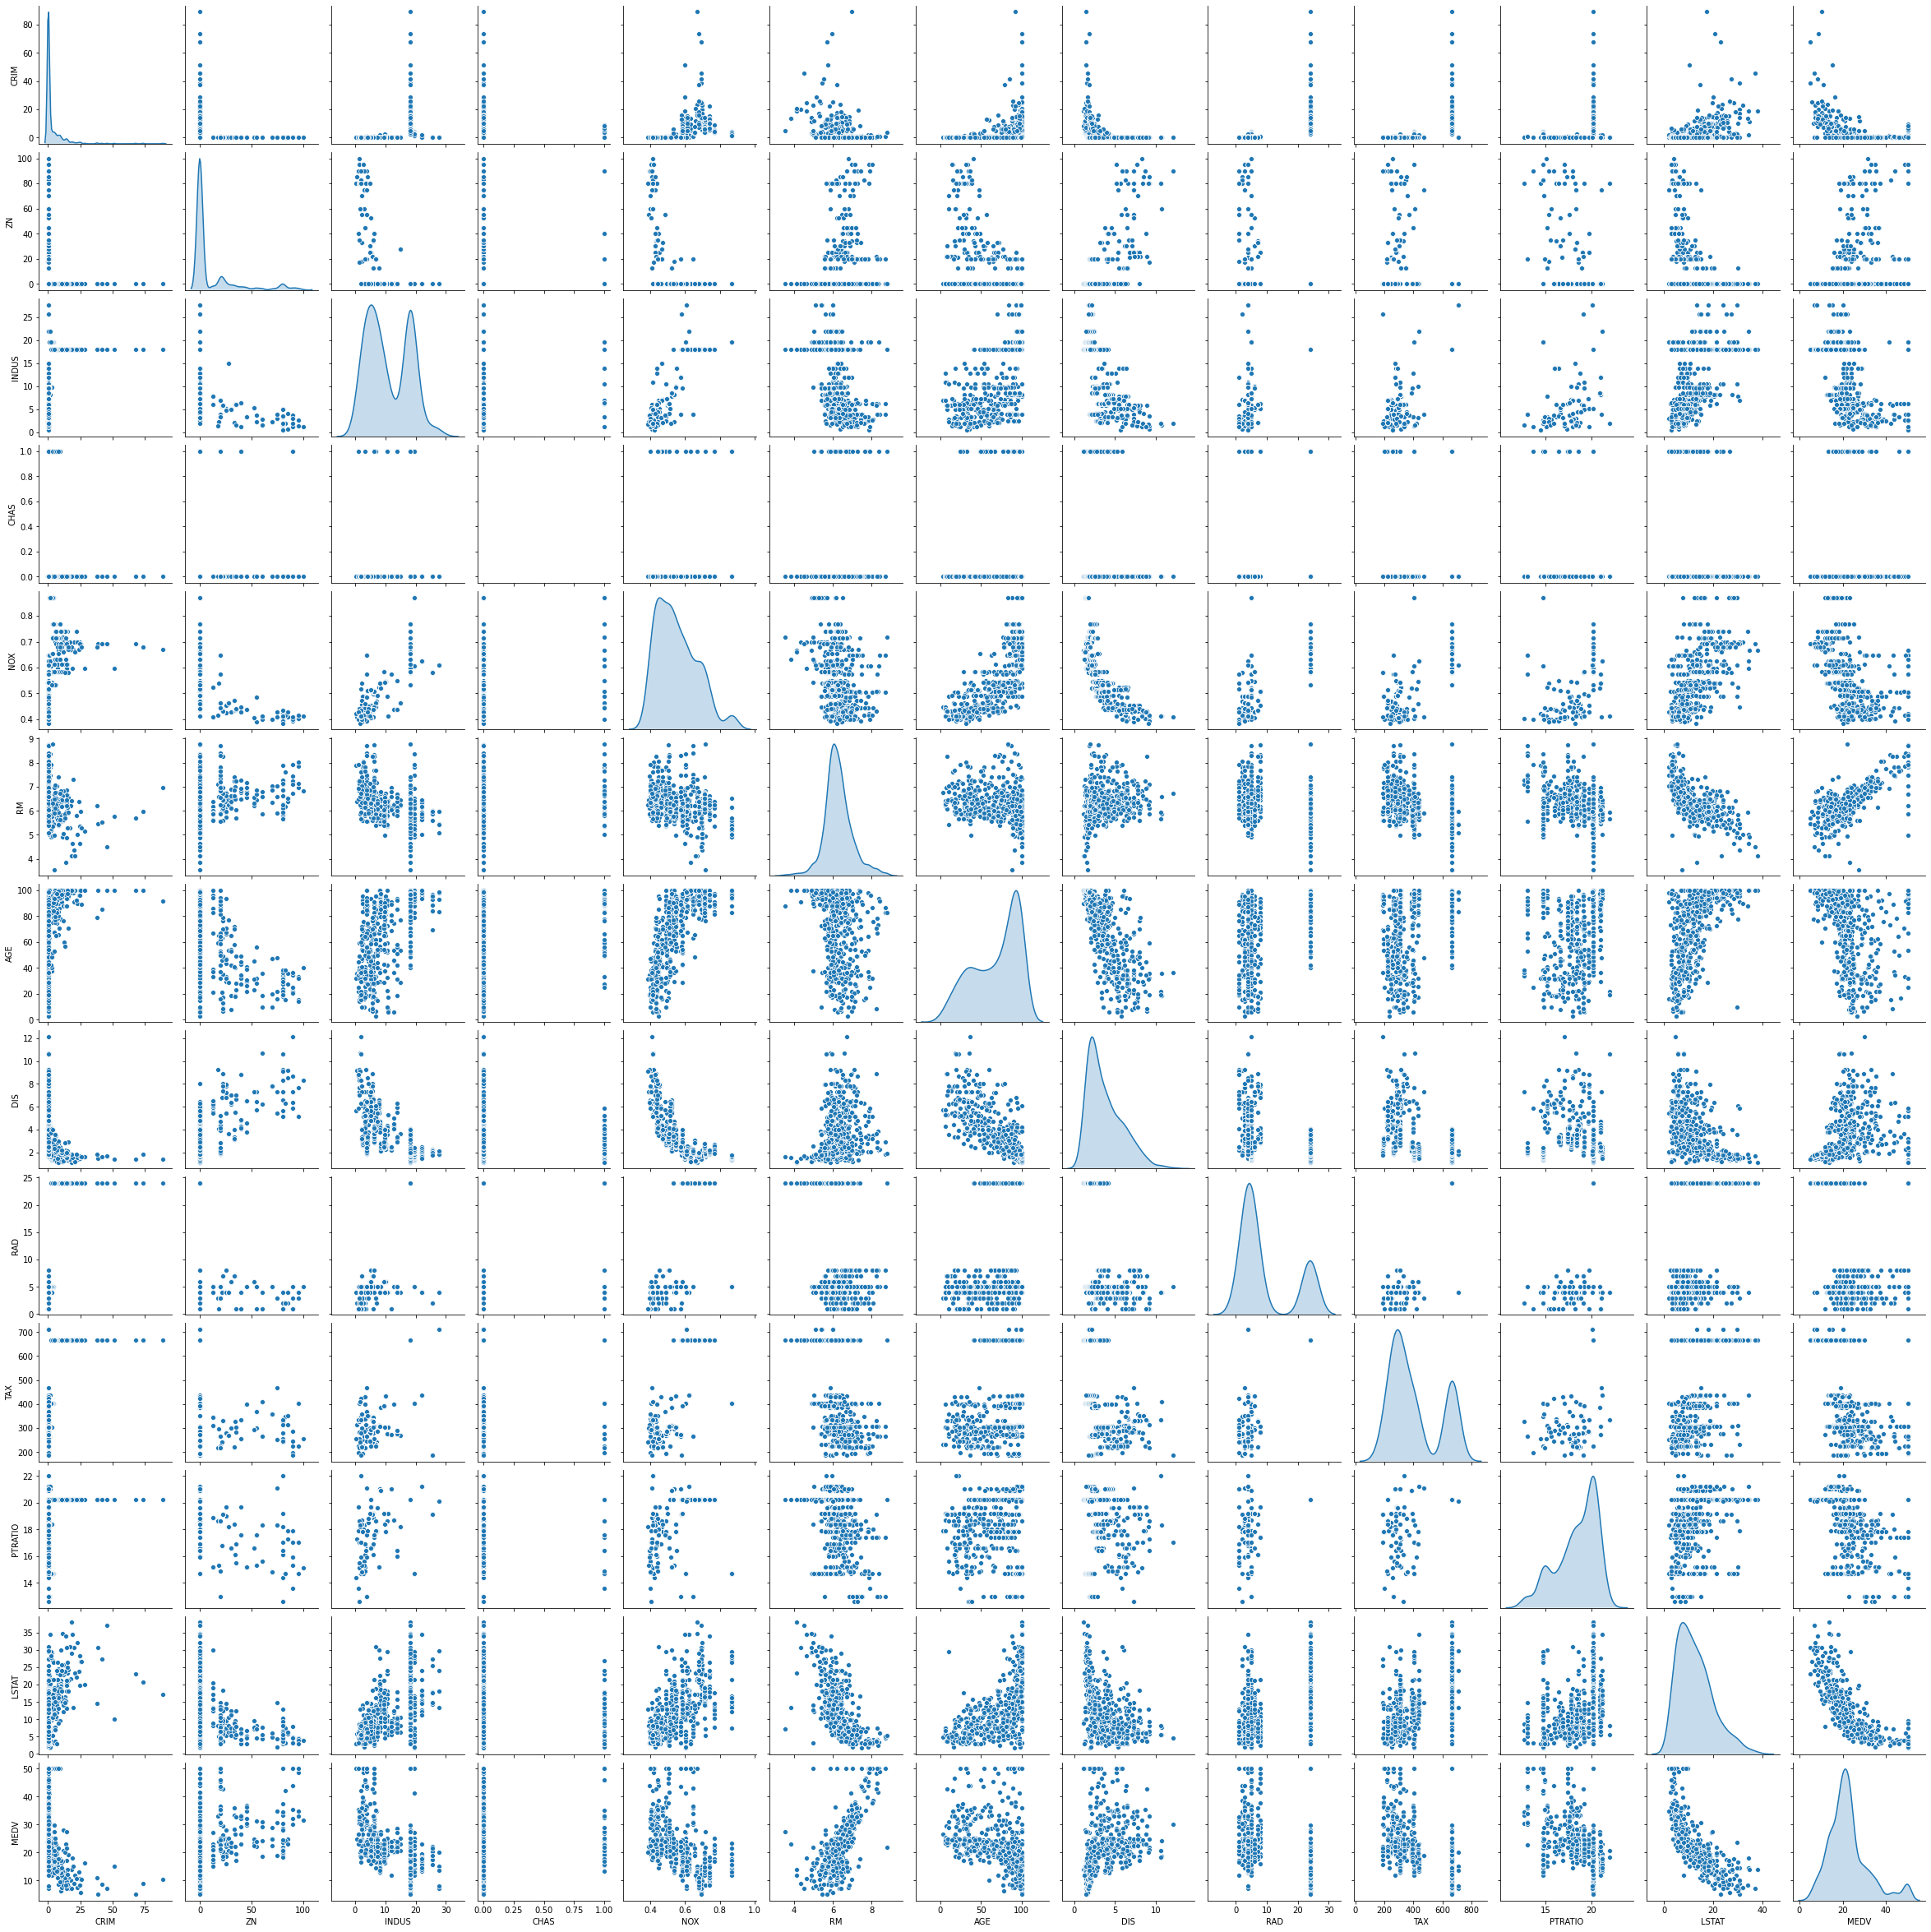

In [7]:
# pairplot
sns.pairplot(data=df, diag_kind='kde')

**Insights -**
- These features are right-skewed: CRIM, ZN, NOX, DIS, LSTAT, MEDV
- NOX was not identified as right-skewed earlier, because mean and median are similar, but the kde plot shows that it is right-skewed 
- These features are left-skewed: AGE, PTRATIO
- These features are clearly bimodal (and have 2 local maxima): INDUS, RAD, TAX.
- RM is symmetric and not skewed. 
- A kde plot of CHAS is not obtained. It applies only to lots bordering the Charles river.
- The pair plots show the correlations between pairs of features, for example:
  - LSTAT AND MEDV have an inverse relationship (lower status is inversely related to median value). 
  - NOX and DIS have an inverse relationship 
  - LSTAT and RM have an inverse relationship (lower status is inversely related to number of rooms).
  - RM and MEDV are positively correlated (as number of rooms increases, median value increases).
  - CRIM (crime rate) decreases as MEDV (median value) increases

 


### 4. Get the Correlation Heatmap and highlight correlation values as asked below.(5 Marks)
- Draw the correlation plot with cmap = 'Oranges' - (2 marks)
- Highlight all the correlations above 0.7 (2 marks)
- Observe the correlation value between DIS and NOX and comment on the same. (1 mark)



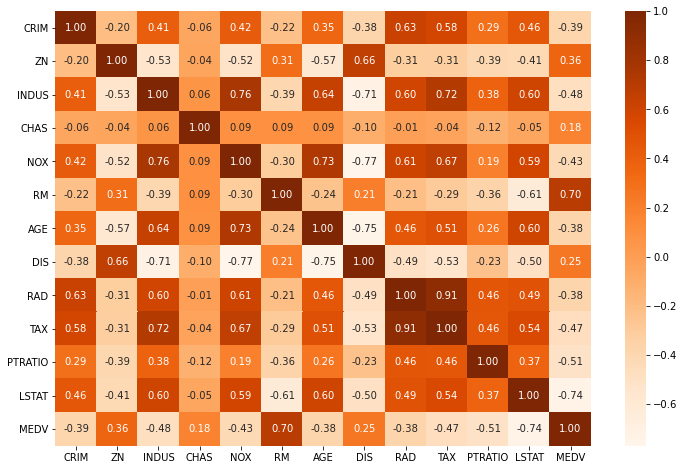

In [8]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Oranges' )
plt.show()

**Comments**

- Correlations above 0.7 (positively correlated):  
  - INDUS, NOX: 0.76
  - INDUS, TAX: 0.72
  - NOX, AGE: 0.73
  - RAD, TAX: 0.91
  
- DIS and NOX have a negative correlation of -0.77. NOx is negatively correlated with distance from unemployment centers. It may be caused by low air quality due to older and inexpensive vehicles used near unemployment centers.

- Similarly, correlations less than -0.7 (negatively correlated):
  - INDUS, DIS: -0.71
  - NOX, DIS: -0.77
  - AGE, DIS: -0.75
  - LSTAT, MEDV: -0.74

In [9]:
# Code to iterate over df.corr() and identify positive correlations >= 0.7:
# Check correlations in lower triangular df.corr(), since it is symmetric.

from itertools import product
pcorr = []
for i, j in product(range(df.corr().shape[0]), range(df.corr().shape[1])):
    row = df.corr().index[i]
    col = df.corr().columns[j]
    if i>j and df.corr().loc[row,col]>=0.7:
            pcorr.append((row,col,round(df.corr().loc[row,col], 2)))
pcorr


[('NOX', 'INDUS', 0.76),
 ('AGE', 'NOX', 0.73),
 ('TAX', 'INDUS', 0.72),
 ('TAX', 'RAD', 0.91)]

In [10]:
# Similarly, code to iterate over df.corr() and identify negative correlations <= -0.7:

ncorr = []
for i, j in product(range(df.corr().shape[0]), range(df.corr().shape[1])):
    row = df.corr().index[i]
    col = df.corr().columns[j]
    if i>j and df.corr().loc[row,col]<=-0.7:
            ncorr.append((row,col,round(df.corr().loc[row,col], 2)))
ncorr

[('DIS', 'INDUS', -0.71),
 ('DIS', 'NOX', -0.77),
 ('DIS', 'AGE', -0.75),
 ('MEDV', 'LSTAT', -0.74)]

### 5.  Split the dataset (2 marks)
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [11]:
# Dependent variable: MEDV

Y = df['MEDV']
X = df.drop(columns = {'MEDV'})

In [12]:
#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

### 6. Scale the features (2 marks)
- Train the scaler on the train data and use it to transform the train and the test data.




In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

X_test = ss.transform(X_test)

X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

### 7. Modelling (15 Marks)

#### 7.1 With all the features (2 marks)

- Use all the features and report the mean of mean_squared_error for the 5 fold validation set. (2 marks)




In [14]:
# Intialise the model and fit the model on the train data
# Let us use the Kfold cross validation with k = 5

from sklearn.model_selection import cross_val_score

lr = LinearRegression()

lr_cv_scores_mse = cross_val_score(lr, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
lr_cv_scores_mse.mean()

print(lr_cv_scores_mse)
print()
print(" Average Mean Squared Error: %0.3f (+/- %0.3f)" % (lr_cv_scores_mse.mean()*-1, lr_cv_scores_mse.std() * 2))

[-32.62206545 -18.74589693 -27.88080966 -29.08994197 -22.17862333]

 Average Mean Squared Error: 26.103 (+/- 9.964)


#### 7.2 Use vif scores to iteratively remove the features with vif values > 5 and report the cross validation Average Mean_Squared_Error at each iteration. (5 marks) 

- Drop the features in an iterative fashion for features With  VIF scores > 5
- Run cross validation with 5 fold to report the average mean_squared_error 

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series))

Series before feature selection: 

CRIM        1.924114
ZN          2.743574
INDUS       3.999538
CHAS        1.076564
NOX         4.396157
RM          1.860950
AGE         3.150170
DIS         4.355469
RAD         8.345247
TAX        10.191941
PTRATIO     1.943409
LSTAT       2.861881
dtype: float64



**Lets drop the feature TAX**

In [16]:
# Drop the feature and report the average mean_squared_Error metric with Kfold cross validation, k = 5

X_train2 = X_train.drop(columns = ['TAX'])

lr = LinearRegression()

lr_cv_scores_mse = cross_val_score(lr,X_train2, y_train, cv = 5, scoring='neg_mean_squared_error')
lr_cv_scores_mse.mean()

print(lr_cv_scores_mse)
print()
print(" Average Mean Squared Error: %0.3f (+/- %0.3f)" % (lr_cv_scores_mse.mean()*-1, lr_cv_scores_mse.std() * 2))

[-33.09895729 -19.12335267 -28.55114912 -29.41833681 -22.53167693]

 Average Mean Squared Error: 26.545 (+/- 10.057)


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)

print('Series before feature selection: \n\n{}\n'.format(vif_series))

Series before feature selection: 

CRIM       1.923159
ZN         2.483399
INDUS      3.270983
CHAS       1.050708
NOX        4.361847
RM         1.857918
AGE        3.149005
DIS        4.333734
RAD        2.942862
PTRATIO    1.909750
LSTAT      2.860251
dtype: float64



**All vif scores under 5**

#### 7.3 Use the best model out of all the ones tried before(based on the least average mean_squared error on the validation set obtained through cross_val_Score)and report the test data metrics (2 marks)

- Fit the model for the training data all over again
- Save the test predictions from the model
- Print the train and the test Rsquared

In [18]:
# Using the X_train as it has the least average MSE value

X_test = X_test[X_train.columns]

lr = LinearRegression()

lr.fit(X_train, y_train)
test_pred = lr.predict(X_test)

print("Train R squared:", lr.score(X_train, y_train))
print("Test R squared:", lr.score(X_test, y_test))

Train R squared: 0.7073732058856179
Test R squared: 0.772168489913416


#### 7.4 Write a function that takes the prediction and the actuals as numpy arrays and returns the RMSE. (3 marks)

- Print the RMSE for the train and the test set using the function RMSE

In [19]:
def RMSE(actual, prediction):

# Initialize RMSE to 0
  rmserr = 0

# Ensure same lengths:
  if len(actual)!=len(prediction):
        print("actual and prediction do not have same lengths")
  else:
    for act, pred in zip(actual, prediction):
        rmserr += (act-pred)**2
    rmserr = rmserr/len(actual)
    rmserr = np.sqrt(rmserr)
  return rmserr


In [20]:
testRMSE= RMSE(y_test, test_pred)

trainRMSE = RMSE(y_train, lr.predict(X_train))

In [21]:
testRMSE, trainRMSE

(4.569658652745799, 4.874227661429434)

#### 7.5 Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. (3 marks)

In [22]:
a = lr.coef_
coeff_data = pd.DataFrame()

# Your code here

coeff_data['Feature'] = X_train.columns
coeff_data['Coefs'] = lr.coef_

coeff_data

,Feature,Coefs
0,CRIM,-0.969104
1,ZN,1.437475
2,INDUS,0.370610
3,CHAS,0.701135
4,NOX,-2.622148
5,RM,1.866446
6,AGE,0.136517
7,DIS,-3.274621
8,RAD,2.626639
9,TAX,-1.940001


In [23]:
# Let us write the equation of the fit
Equation = "Price ="
print(Equation, end='\t')
for i in range(0, 13):
    if(i!=12):
        print("(",coeff_data.iloc[i].Coefs,")", "*", coeff_data.iloc[i].Feature, "+", end = '  ')
    else:
        print(lr.intercept_)

Price =	( -0.9691041779394559 ) * CRIM +  ( 1.4374751085628352 ) * ZN +  ( 0.37061006699438026 ) * INDUS +  ( 0.7011346214239947 ) * CHAS +  ( -2.622147525842737 ) * NOX +  ( 1.8664458062800238 ) * RM +  ( 0.13651655309868496 ) * AGE +  ( -3.2746207827625136 ) * DIS +  ( 2.626638511065884 ) * RAD +  ( -1.940001225241942 ) * TAX +  ( -2.120298107079978 ) * PTRATIO +  ( -4.2600571415145705 ) * LSTAT +  22.339830508474577
